In [1]:
# 필요한 패키지 설치
# !pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
df = pd.read_csv("./data/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [3]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


## 결측치 확인

In [4]:
# 결측값 수만 확인
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

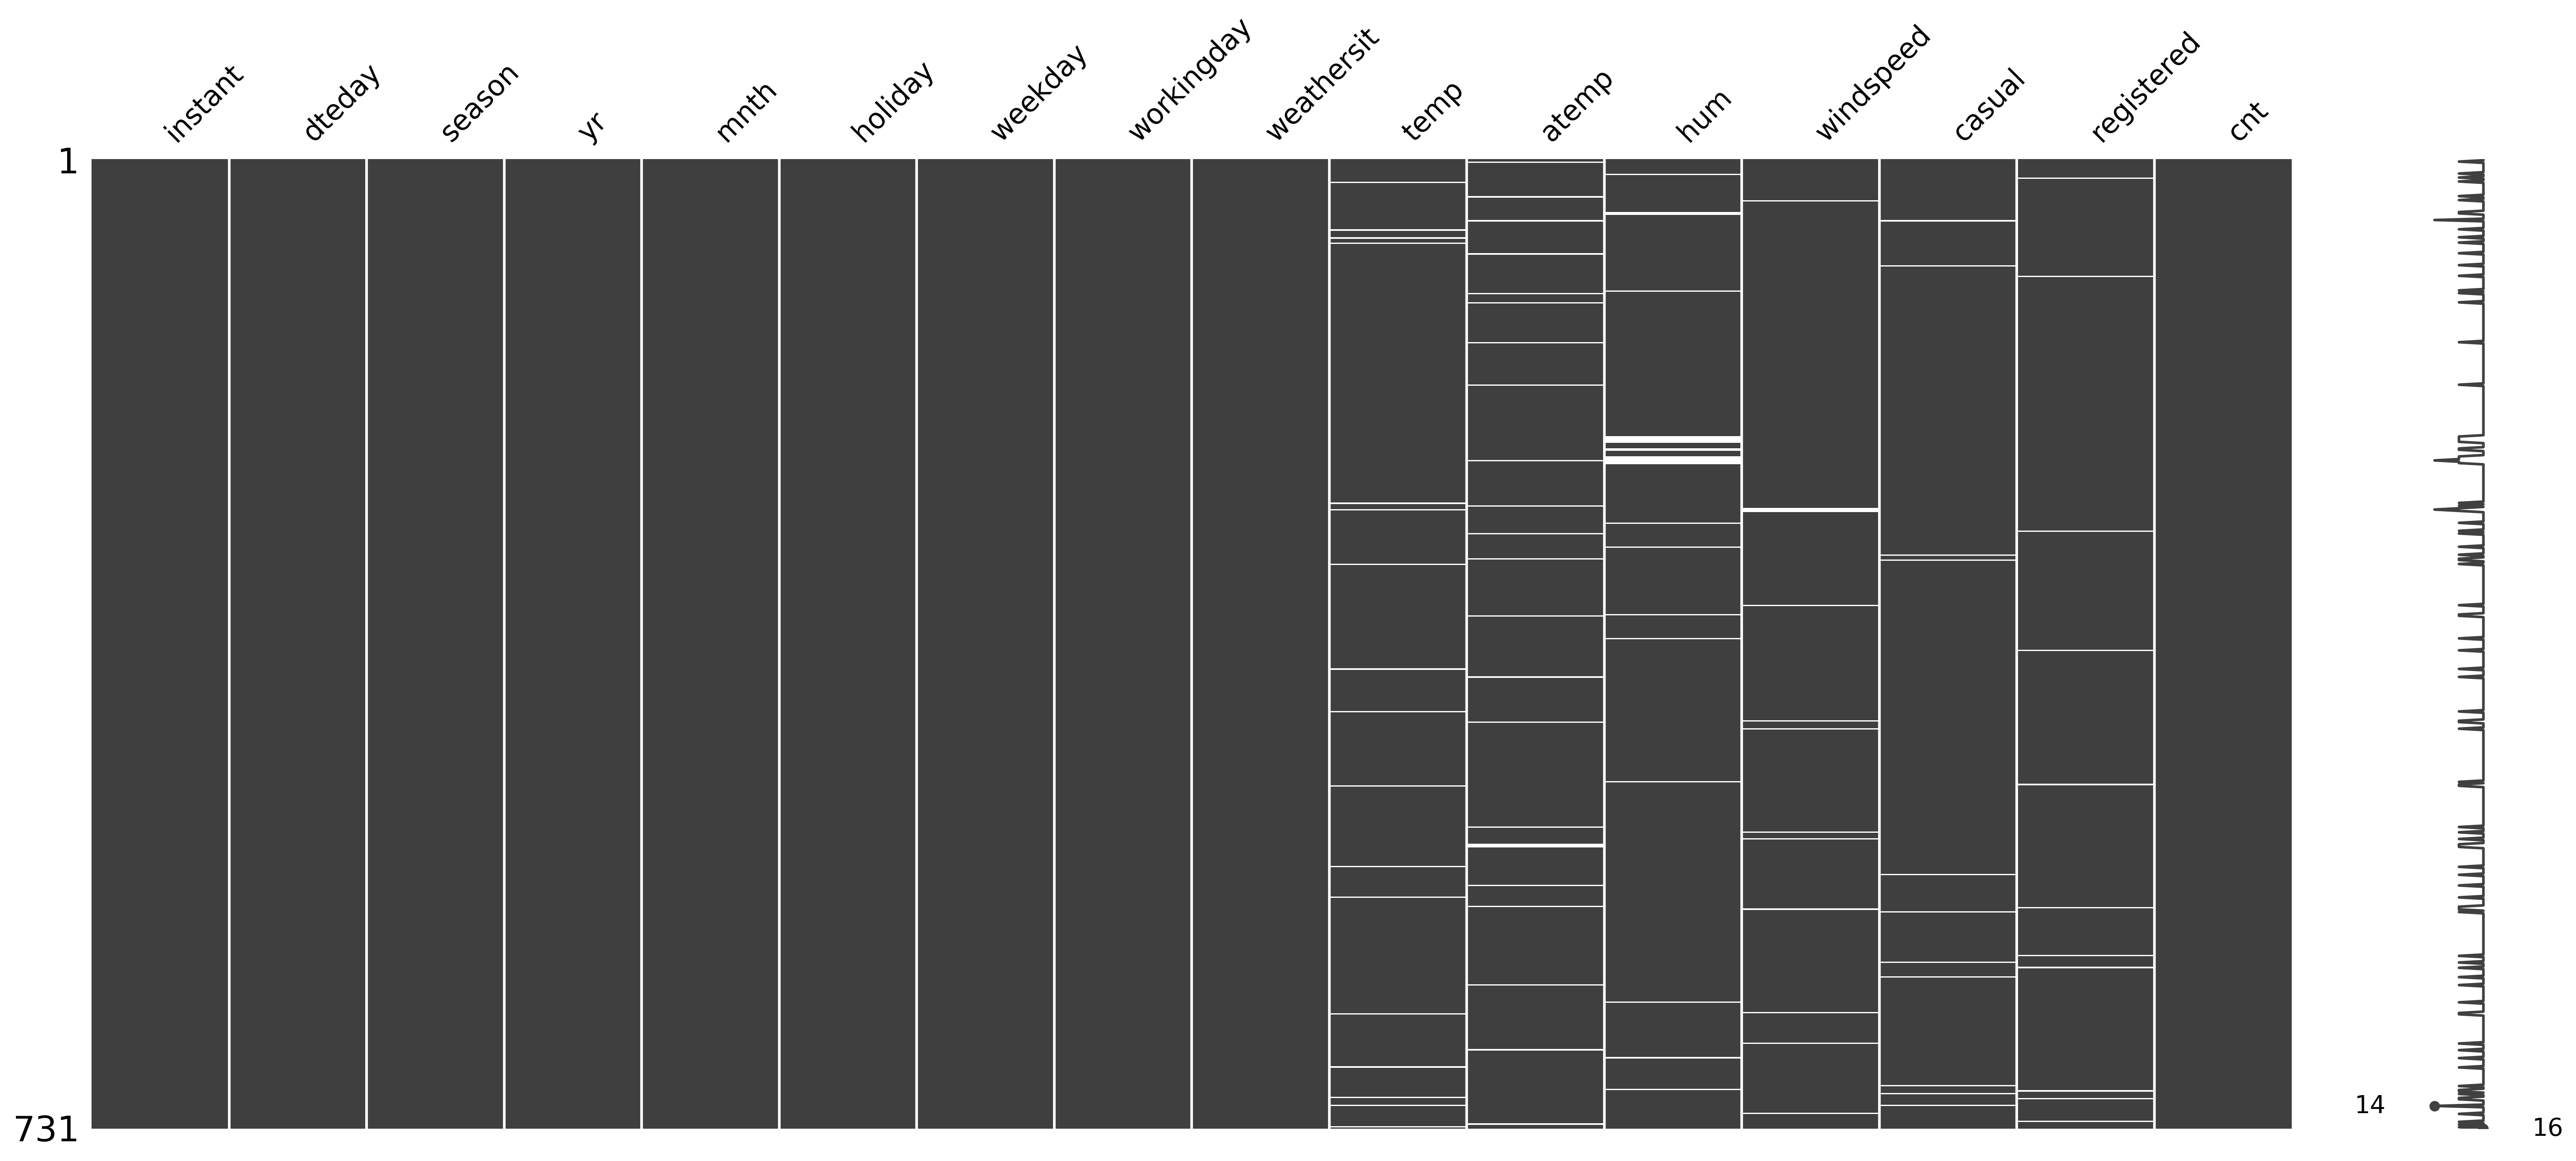

In [5]:
# 결측값 시각화 - 전체 컬럼의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show()


## 결측치 제거

In [6]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#데이터 제거 한 후 사이즈
df_drop_all.shape, df_drop_3.shape, df_drop_slt.shape,df_drop_any.shape

((731, 16), (731, 16), (714, 16), (634, 16))

## 결측치 채우기

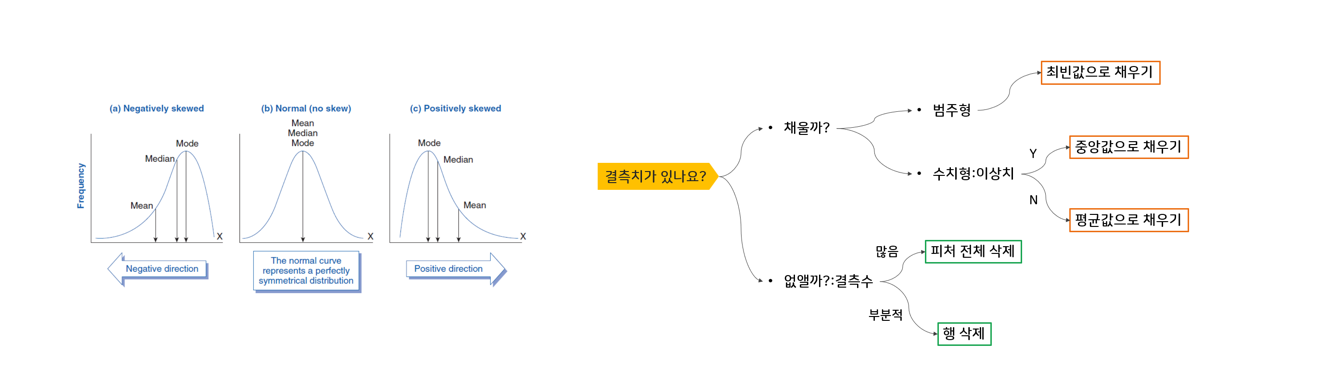

In [16]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df.mean(numeric_only=True))

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean(numeric_only=True)})

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df.median(numeric_only=True))

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median(numeric_only=True)})

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode(numeric_only=True))

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'].min(),'hum':df['hum'].min()})


df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64